<a href="https://colab.research.google.com/github/BragatteMAS/Crosstope/blob/master/analyses/PDB_edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install biopandas

In [ ]:
from biopandas.pdb import PandasPdb

# Initialize a new PandasPdb object
# and fetch the PDB file from rcsb.org
ppdb = PandasPdb().fetch_pdb('6zlr')

In [19]:
#Load pdb locally
ppdb.read_pdb('./6zlr.pdb')

In [20]:
print('PDB Code: %s' % ppdb.code)
print('PDB Header Line: %s' % ppdb.header)
print('\nRaw PDB file contents:\n\n%s\n...' % ppdb.pdb_text[:1000])

PDB Code: xxxx
PDB Header Line:     VIRAL PROTEIN                           2020-07-01  XXXX

Raw PDB file contents:

HEADER    VIRAL PROTEIN                           2020-07-01  XXXX              
AUTHOR    G.F.DE NICOLA, C.E.NICHOLS                                            
JRNL        AUTH   C.Nichols, J.Ng, A.Keshu, F.Fraternali, G.F.De Nicola        
JRNL        TITL   A New Crystal Form of the SARS-CoV-2 Receptor Binding        
JRNL        TITL 2 Domain: CR3022 Complex-An Ideal Target for In-Crystal        
JRNL        TITL 3 Fragment Screening of the ACE2 Binding Site Surface.         
JRNL        REF    Front Pharmacol               V.  11 15211 2020              
JRNL        REFN                CH      1663-9812                               
JRNL        PMID   33381049                                                     
JRNL        DOI    10.3389/fphar.2020.615211                                    
CRYST1  207.130  207.130  199.866  90.00  90.00  90.00 P 41 21 2    24  

In [36]:
ppdb.df.keys() #in a dict exist key & values

dict_keys(['ATOM', 'HETATM', 'ANISOU', 'OTHERS'])

In [37]:
ppdb.df['ATOM'].dtypes #this are the values from key ATOM

record_name        object
atom_number         int64
blank_1            object
atom_name          object
alt_loc            object
residue_name       object
blank_2            object
chain_id           object
residue_number      int64
insertion          object
blank_3            object
x_coord           float64
y_coord           float64
z_coord           float64
occupancy         float64
b_factor          float64
blank_4            object
segment_id         object
element_symbol     object
charge            float64
line_idx            int64
dtype: object

In [38]:
ppdb.df['ATOM'].columns #image an excel index is the name of columns (headers at R language)

Index(['record_name', 'atom_number', 'blank_1', 'atom_name', 'alt_loc',
       'residue_name', 'blank_2', 'chain_id', 'residue_number', 'insertion',
       'blank_3', 'x_coord', 'y_coord', 'z_coord', 'occupancy', 'b_factor',
       'blank_4', 'segment_id', 'element_symbol', 'charge', 'line_idx'],
      dtype='object')

In [39]:
ppdb.df['ATOM'][ppdb.df['ATOM']['residue_name'] == 'ALA'].head() #filter only Alanine aa

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
29,ATOM,30,,N,,PRO,,A,337,,,-3.747,41.595,30.326,1.0,97.30,,,N,NaN,43
30,ATOM,31,,CA,,PRO,,A,337,,,-3.383,41.058,29.018,1.0,104.14,,,C,NaN,44
31,ATOM,32,,C,,PRO,,A,337,,,-2.480,42.022,28.238,1.0,107.60,,,C,NaN,45
32,ATOM,33,,O,,PRO,,A,337,,,-2.804,42.336,27.109,1.0,114.65,,,O,NaN,46
33,ATOM,34,,CB,,PRO,,A,337,,,-4.760,40.895,28.360,1.0,102.03,,,C,NaN,47


In [41]:
#Localize the chain with AAA:
ppdb.df['ATOM'][ppdb.df['ATOM']['chain_id'] == 'AAA'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx


In [43]:
#No match. Trying different search...
ppdb.df['ATOM'][ppdb.df['ATOM']['chain_id'] == 'A'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,THR,,A,333,,,-5.843,32.760,36.030,1.0,156.01,,,N,NaN,14
1,ATOM,2,,CA,,THR,,A,333,,,-6.637,33.230,34.845,1.0,157.40,,,C,NaN,15
2,ATOM,3,,C,,THR,,A,333,,,-6.344,34.712,34.566,1.0,161.98,,,C,NaN,16
3,ATOM,4,,O,,THR,,A,333,,,-6.078,35.029,33.389,1.0,164.99,,,O,NaN,17
4,ATOM,5,,CB,,THR,,A,333,,,-8.147,33.007,35.033,1.0,149.13,,,C,NaN,18


# Plot

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

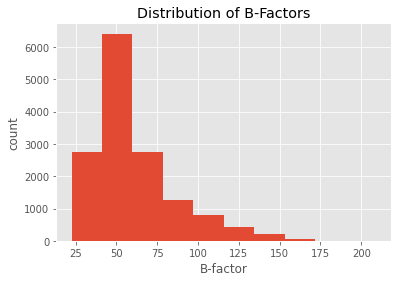

In [47]:
ppdb.df['ATOM']['b_factor'].plot(kind='hist')
plt.title('Distribution of B-Factors')
plt.xlabel('B-factor')
plt.ylabel('count')
plt.show()

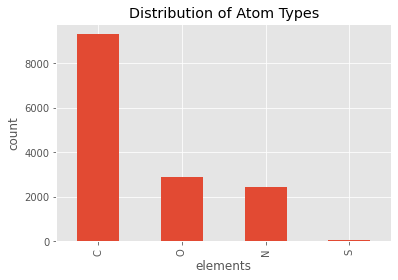

In [48]:
ppdb.df['ATOM']['element_symbol'].value_counts().plot(kind='bar')
plt.title('Distribution of Atom Types')
plt.xlabel('elements')
plt.ylabel('count')
plt.show()

[Biopandas ref](https://rasbt.github.io/biopandas/api_subpackages/biopandas.pdb/)